<ÏàúÏÑú><br>
Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ï∏°Ïπò, ÌÉÄÏûÖ ÌôïÏù∏ -> Í≤∞Ï∏°Ïπò ÏûàÏúºÎ©¥ Ï≤òÎ¶¨-> Î†àÍ∑∏ÌîåÎ°Ø(Ïù¥ÏÉÅÏπòÌôïÏù∏) -> Í∏∞Ïà†ÌÜµÍ≥Ñ, ÎèÑÏàòÎ∂ÑÌè¨Ìëú(Ïù¥ÏÉÅÏπòÌôïÏù∏2) -><br> Ïù¥ÏÉÅÏπò Ï†úÍ±∞-> Î†àÍ∑∏ÌîåÎ°Ø -> Í∏∞Ïà†ÌÜµÍ≥Ñ, ÎèÑÏàòÎ∂ÑÌè¨Ìëú(Ïù¥ÏÉÅÏπòÏ†úÍ±∞ ÌôïÏù∏)-> Ïã†Î¢∞Íµ¨Í∞Ñ ÌôïÏù∏(ÏãúÍ∞ÅÌôî) -> Ï†ïÍ∑úÎ∂ÑÌè¨Í∞ÄÏ†ï(Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï ÎåÄÏ≤¥) -><br> ÌëúÏ§ÄÌôî -> pca -> ÏÉÅÍ¥ÄÎ∂ÑÏÑù -> ÌöåÍ∑ÄÎ∂ÑÏÑù -> Í∑∏ÎûòÌîÑ,Ï∞®Ìä∏ Ï†úÏãú

In [41]:
from pandas import read_excel, DataFrame, merge, cut
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy import stats
import seaborn as sb
import numpy as np
from patsy import dmatrix
import sys
import os
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency,t
import statsmodels.api as sm

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import myOls, getConfidenceInterval

In [42]:
df=read_excel("ÏÑ∏ÎØ∏ÌîÑÎ°úÏ†ùÌä∏3.xlsx")
df

Ï¥ùÏÉùÌôúÎπÑ  Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù  ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù  Í∏∞ÌÉÄ_ÏÜåÎìù  ÏÑ∏Í∏àÌôòÍ∏âÍ∏à  Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú  Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê  \
0      275          0.0         0    7.0    0.0   10000            0   
1      239          0.0         0    7.0    0.0       0            0   
2      156          0.0        80    7.0    0.0   14000          720   
3      541        140.0         0    9.0    0.0       0            0   
4       85         50.0         0    7.0    0.0       0            0   
...    ...          ...       ...    ...    ...     ...          ...   
7860   384          0.0         0    1.0   70.0    3000           96   
7861   715          0.0       660    1.0   90.0   40000            0   
7862   595          0.0      4000    1.0    0.0   25947           67   
7863   562         40.0         0    0.0    0.0   12000          360   
7864   514          0.0         0    1.0    0.0    1880            0   

      Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°  Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù  
0          0.0          0  
1          0.0          0  
2      20500.0        540  
3          0.0          0  
4          0.0          0  
...        ...        ...  
7860    3000.0          0  
7861       0.0          0  
7862   25947.0          0  
7863   12000.0          0  
7864       0.0          0  

[7865 rows x 9 columns]

In [43]:
#ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Ïπ¥ÌîºÎ≥∏ ÏÉùÏÑ±
df1=df.copy()

In [44]:
#Í∞Å Î≥ÄÏàò Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ ÌôïÏù∏ÌïòÍ∏∞
df1.dtypes

Ï¥ùÏÉùÌôúÎπÑ             int64
Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù    float64
ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù         int64
Í∏∞ÌÉÄ_ÏÜåÎìù          float64
ÏÑ∏Í∏àÌôòÍ∏âÍ∏à          float64
Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú           int64
Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê      int64
Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°       float64
Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù        int64
dtype: object

forÎ¨∏ÏúºÎ°ú Ïª¨Îüº ÎèåÎ†§ÏÑú ÏàòÏπòÍ∞Ä 0Ïù∏Í∞í, 0Ïù¥ ÏïÑÎãåÍ∞í Ï∞æÏïÑÎ≥¥Í∏∞

In [45]:
for column in df1.columns:
    zero_count = df1.loc[df1[column] == 0].shape[0]
    number_count = df1.loc[df1[column] != 0].shape[0]
    print('0 Í∞úÏàò :',{column : zero_count})
    print('0 ÏïÑÎãå Ïàò :',{column : number_count})
    print('-'*30)

0 Í∞úÏàò : {'Ï¥ùÏÉùÌôúÎπÑ': 0}
0 ÏïÑÎãå Ïàò : {'Ï¥ùÏÉùÌôúÎπÑ': 7865}
------------------------------
0 Í∞úÏàò : {'Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù': 5489}
0 ÏïÑÎãå Ïàò : {'Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù': 2376}
------------------------------
0 Í∞úÏàò : {'ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù': 6707}
0 ÏïÑÎãå Ïàò : {'ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù': 1158}
------------------------------
0 Í∞úÏàò : {'Í∏∞ÌÉÄ_ÏÜåÎìù': 1439}
0 ÏïÑÎãå Ïàò : {'Í∏∞ÌÉÄ_ÏÜåÎìù': 6426}
------------------------------
0 Í∞úÏàò : {'ÏÑ∏Í∏àÌôòÍ∏âÍ∏à': 6275}
0 ÏïÑÎãå Ïàò : {'ÏÑ∏Í∏àÌôòÍ∏âÍ∏à': 1590}
------------------------------
0 Í∞úÏàò : {'Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú': 5500}
0 ÏïÑÎãå Ïàò : {'Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú': 2365}
------------------------------
0 Í∞úÏàò : {'Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê': 6414}
0 ÏïÑÎãå Ïàò : {'Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê': 1451}
------------------------------
0 Í∞úÏàò : {'Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°': 5342}
0 ÏïÑÎãå Ïàò : {'Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°': 2523}
------------------------------
0 Í∞úÏàò : {'Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù': 4777}
0 Ïï

# `Ïù¥ÏÉÅÏπò/Í≤∞Ï∏°Ïπò` ÌôïÏù∏ Î∞è Ï≤òÎ¶¨

- Ï¢ÖÏÜçÎ≥ÄÏàò
>Ï¥ùÏÉùÌôúÎπÑ

- ÎèÖÎ¶ΩÎ≥ÄÏàò
> 'Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù','ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù','Í∏∞ÌÉÄ_ÏÜåÎìù','ÏÑ∏Í∏àÌôòÍ∏âÍ∏à','Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú'</br>
> 'Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê','Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°','Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù'

- Î∂àÎ°úÏÜåÎìùÏóê Ìè¨Ìï®ÎêòÎäî Î≥ÄÏàò
> Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù, ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù, Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù,ÏÑ∏Í∏àÌôòÍ∏âÍ∏à

- Î∂ÄÏ±ÑÏóê Ìè¨Ìï®ÎêòÎäî Î≥ÄÏàò
> Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú, Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê, Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°

ÏÇ¨Ïö©Ìï† Î∂ÑÏÑùÎ∞©Î≤ï ÌõÑÎ≥¥

1. ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÎ∂ÑÏÑù

2. ÌöåÍ∑ÄÎ∂ÑÏÑù(Îã®ÏàúÌöåÍ∑Ä,Îã§Ï§ëÌöåÍ∑Ä)

3. 

In [46]:
#Í∑∏ÎûòÌîÑ ÏÑ∏ÌåÖÌïòÍ∏∞
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [47]:
df1.head()

Ï¥ùÏÉùÌôúÎπÑ  Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù  ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù  Í∏∞ÌÉÄ_ÏÜåÎìù  ÏÑ∏Í∏àÌôòÍ∏âÍ∏à  Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú  Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê  Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°  \
0   275          0.0         0    7.0    0.0   10000            0       0.0   
1   239          0.0         0    7.0    0.0       0            0       0.0   
2   156          0.0        80    7.0    0.0   14000          720   20500.0   
3   541        140.0         0    9.0    0.0       0            0       0.0   
4    85         50.0         0    7.0    0.0       0            0       0.0   

   Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù  
0          0  
1          0  
2        540  
3          0  
4          0

Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [48]:
#Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌïúÎ≤àÏóê Í≤∞Ï∏°Ïπò Ï°∞ÌöåÌïòÎäî Î∞©Î≤ï
df1.isna().sum()

Ï¥ùÏÉùÌôúÎπÑ              0
Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù       0
ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù          0
Í∏∞ÌÉÄ_ÏÜåÎìù             0
ÏÑ∏Í∏àÌôòÍ∏âÍ∏à             0
Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú            0
Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê       0
Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°       1079
Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù         0
dtype: int64

Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï° Í≤∞Ï∏°Ïπò 1079Í±¥ ÏàòÏπòÍ∞í'0'ÏúºÎ°ú Í∞ÑÏ£ºÌïòÍ≥† ÎåÄÏ≤¥

In [49]:
re_df1=df1.fillna(value=0)
re_df1

Ï¥ùÏÉùÌôúÎπÑ  Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù  ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù  Í∏∞ÌÉÄ_ÏÜåÎìù  ÏÑ∏Í∏àÌôòÍ∏âÍ∏à  Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú  Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê  \
0      275          0.0         0    7.0    0.0   10000            0   
1      239          0.0         0    7.0    0.0       0            0   
2      156          0.0        80    7.0    0.0   14000          720   
3      541        140.0         0    9.0    0.0       0            0   
4       85         50.0         0    7.0    0.0       0            0   
...    ...          ...       ...    ...    ...     ...          ...   
7860   384          0.0         0    1.0   70.0    3000           96   
7861   715          0.0       660    1.0   90.0   40000            0   
7862   595          0.0      4000    1.0    0.0   25947           67   
7863   562         40.0         0    0.0    0.0   12000          360   
7864   514          0.0         0    1.0    0.0    1880            0   

      Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°  Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù  
0          0.0          0  
1          0.0          0  
2      20500.0        540  
3          0.0          0  
4          0.0          0  
...        ...        ...  
7860    3000.0          0  
7861       0.0          0  
7862   25947.0          0  
7863   12000.0          0  
7864       0.0          0  

[7865 rows x 9 columns]

In [50]:
#Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Î°ú ÏàòÏ†ïÎêòÏóàÎã§.
re_df1.isna().sum()

Ï¥ùÏÉùÌôúÎπÑ           0
Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù    0
ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù       0
Í∏∞ÌÉÄ_ÏÜåÎìù          0
ÏÑ∏Í∏àÌôòÍ∏âÍ∏à          0
Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú         0
Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê    0
Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°       0
Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù      0
dtype: int64

In [51]:
#Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï¥àÌÜµÍ≥ÑÎüâ ÌôïÏù∏
#Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóê ÏïûÏÑú Ï†ÑÏ≤¥Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏßïÏùÑ ÏïåÏïÑÎ≥¥Í∏∞ ÏúÑÌï¥ Í∏∞Ï¥àÌÜµÍ≥ÑÎüâ ÌëúÎ°ú ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïúÎã§.
re_df1.describe()

Ï¥ùÏÉùÌôúÎπÑ   Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù      ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù        Í∏∞ÌÉÄ_ÏÜåÎìù        ÏÑ∏Í∏àÌôòÍ∏âÍ∏à  \
count    7865.000000   7865.000000   7865.000000  7865.000000  7865.000000   
mean      329.821615     55.537889    129.335537     8.455906    14.505976   
std      1314.994181    347.927318    644.462635    87.829841    59.830654   
min        23.000000      0.000000      0.000000     0.000000  -700.000000   
25%       121.000000      0.000000      0.000000     1.000000     0.000000   
50%       228.000000      0.000000      0.000000     7.000000     0.000000   
75%       435.000000     20.000000      0.000000     8.000000     0.000000   
max    114446.000000  22025.000000  17640.000000  5506.000000  1000.000000   

              Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú  Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê       Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°    Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù  
count    7865.000000  7865.000000    7865.000000  7865.000000  
mean     2958.797203    53.391736    1773.447552   288.638525  
std      8277.347380   195.465924    5527.462362   675.030701  
min         0.000000     0.000000       0.000000     0.000000  
25%         0.000000     0.000000       0.000000     0.000000  
50%         0.000000     0.000000       0.000000     0.000000  
75%      1700.000000     0.000000       0.000000   288.000000  
max    200000.000000  7200.000000  120000.000000  8796.000000

Í∏∞Ï¥àÌÜµÍ≥ÑÎüâ ÌôïÏù∏ Í≤∞Í≥º Í∞Å Ïª¨ÎüºÎ≥Ñ ÌèâÍ∑†ÏπòÏóê ÎπÑÌï¥ maxÍ∞íÏù¥ ÎπÑÏ†ïÏÉÅÏ†ÅÏúºÎ°ú ÎÜíÏùÄ ÏàòÏπòÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ÏûàÏùåÏùÑ ÌëúÎ°ú ÌôïÏù∏ÎêúÎã§. 

Ïù¥Î•º Í∑ºÍ±∞Î°ú Ïù¥ÏÉÅÏπòÍ∞Ä Ï°¥Ïû¨Ìï† Ïàò ÏûàÎã§Í≥† ÌåêÎã®Ìï† ÏàòÎèÑ ÏûàÎã§.

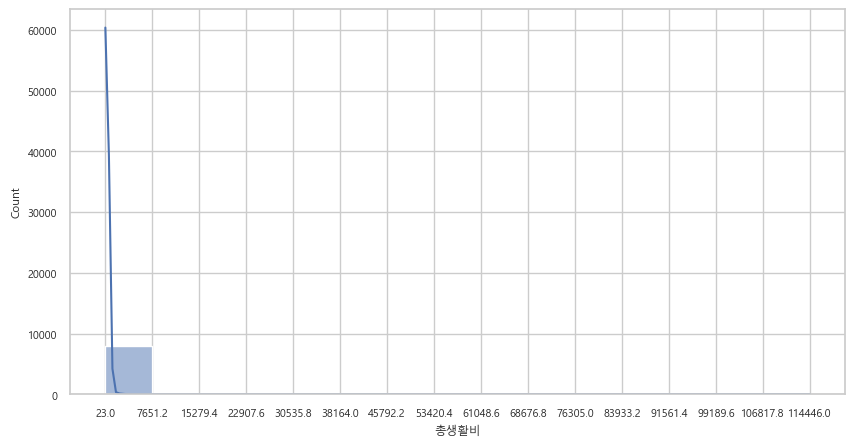

In [52]:
#Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ ÎèÑÏàòÎ∂ÑÌè¨ ÌôïÏù∏(ÌûàÏä§ÌÜ†Í∑∏ÌñÑ)
#ÏàòÏßëÎêú ÏûêÎ£åÎ•º ÏùºÎ™©ÏöîÏó∞ÌïòÍ≤å Ï†ïÎ¶¨Ìï¥ÏÑú Î≥º Ïàò ÏûàÎèÑÎ°ù ÎèÑÏàòÎ∂ÑÌè¨ÌëúÎ•º ÌÜµÌï¥ ÌôïÏù∏Ìï¥Î≥¥Í≥†Ïûê ÌïúÎã§.

hist,bins=np.histogram(re_df1['Ï¥ùÏÉùÌôúÎπÑ'],bins=15)
bins2 = np.round(bins, 1)

plt.figure()
sb.set_theme(style='whitegrid', font='Malgun Gothic', font_scale=0.7)
sb.histplot(data=re_df1,x='Ï¥ùÏÉùÌôúÎπÑ',bins=15,kde=True)
plt.xticks(bins2, bins2)
plt.show()
plt.close()


#Ìï¥Îãπ ÏΩîÎìú forÎ¨∏ Î∞è subplotÏúºÎ°ú ÎèåÎ†§ÏÑú Ïª¨Îüº Î≥Ñ ÎèÑÏàòÎ∂ÑÌè¨ Ï†ÑÎ∂Ä ÌôïÏù∏Ìï¥Î≥¥Í∏∞

## #Ï†ÑÏ≤òÎ¶¨1. Ï¢ÖÏÜç/ÎèÖÎ¶ΩÎ≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ

ÎèôÏãúÏóê Ïù¥ÏÉÅÏπò ÌôïÏù∏

Í∑ÄÎ¨¥Í∞ÄÏÑ§: Ï¥ùÏÉùÌôúÎπÑÏôÄ yÍ∞íÏùò ÏÉÅÍ¥ÄÏù¥ ÏóÜÎã§.<br>
ÎåÄÎ¶ΩÍ∞ÄÏÑ§: Ï¥ùÏÉùÌôúÎπÑÎäî yÍ∞íÍ≥º ÏÉÅÍ¥ÄÏù¥ ÏûàÎã§.

### Í∞Å Ïª¨Îüº Î≥Ñ Ïù¥ÏÉÅÏπò Ï∞æÍ∏∞(1)

#### Î≥¥Í∏∞ ÏâΩÍ≤å sub plot Î∞è forÎ¨∏ Ïù¥Ïö©Ìï¥ÏÑú ÌïúÎ≤àÏóê Ï°∞Ìöå (regplot)

In [53]:
# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±ÏùÑ ÏúÑÌï¥ Ïª¨Îüº Ïù¥Î¶Ñ, Í∏∏Ïù¥ ÌôïÏù∏
re_df1.head()
re_df1.columns
len(re_df1.columns)

9

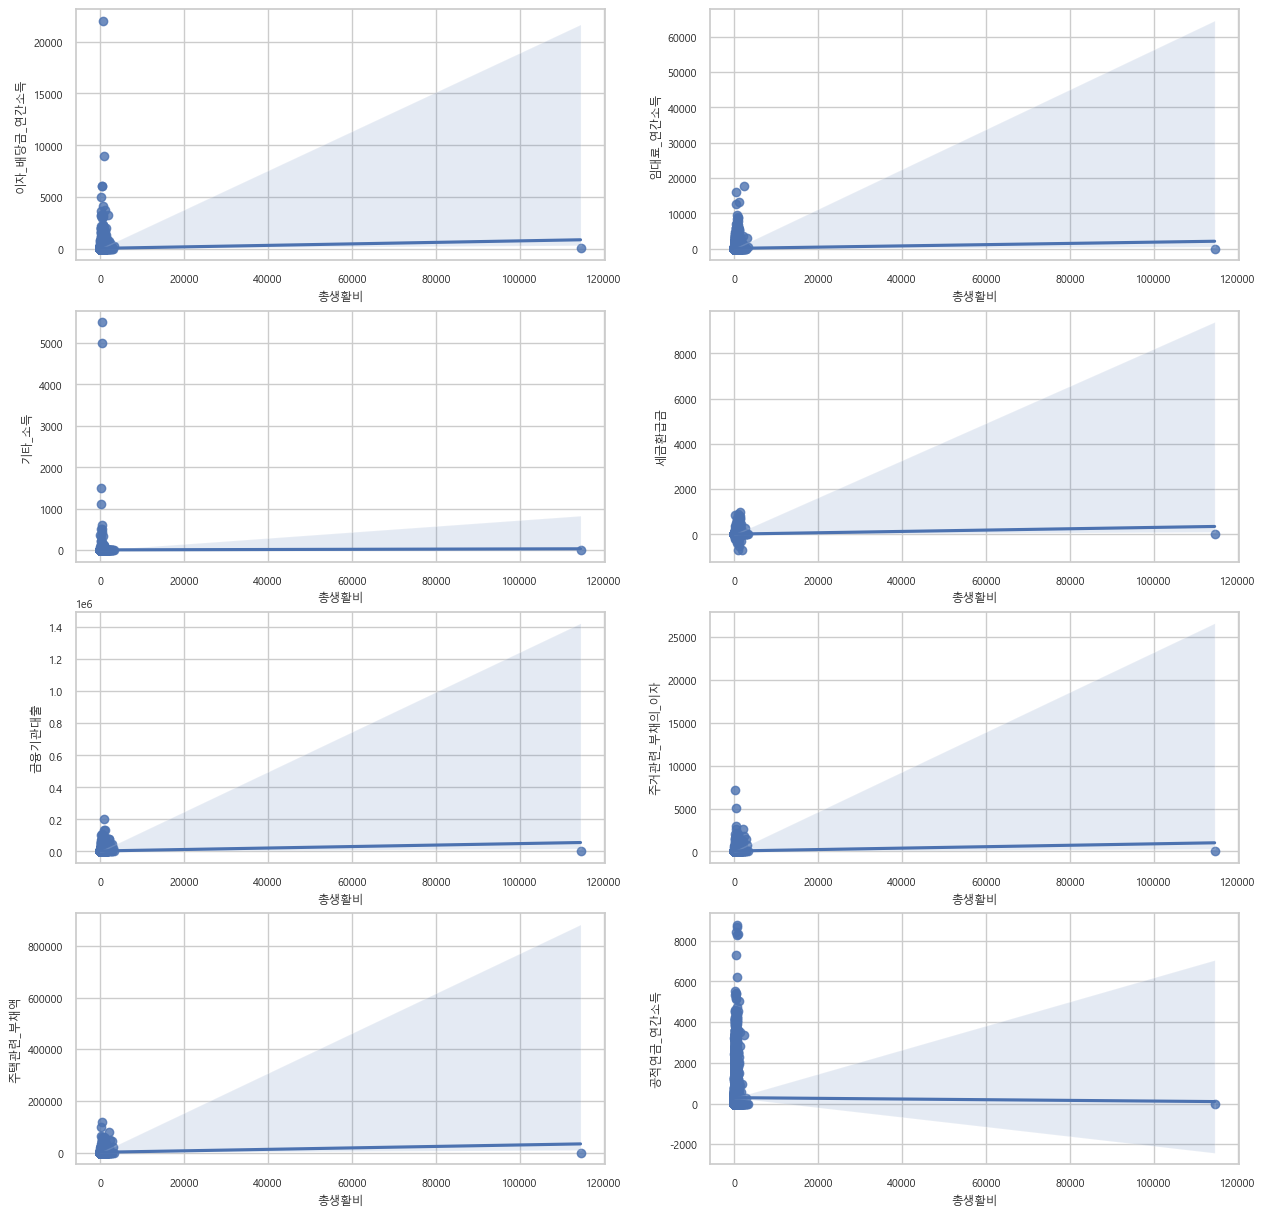

In [54]:
# index = 0Î∂ÄÌÑ∞ ÏãúÏûëÌïòÎ©¥ 'Ï¥ùÏÉùÌôúÎπÑ'-'Ï¥ùÏÉùÌôúÎπÑ' Í∑∏ÎûòÌîÑÎèÑ Í∑∏Î¶¨Î†§Í≥† ÏãúÎèÑÌï®
columns = list(re_df1.columns)[1:]

# 4Ìñâ 2Ïó¥Î°ú 8Í∞úÏùò ÏÑúÎ∏åÌîåÎ°Ø Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ï
dependent_variable = 'Ï¥ùÏÉùÌôúÎπÑ'

for i, c in enumerate(columns):
    row, col = divmod(i, 2)
    sb.regplot(data=re_df1, x=dependent_variable, y=c, ax=ax[row, col])
    ax[row, col].set_xlabel(dependent_variable)
    ax[row, col].set_ylabel(c)
    ax[row, col].grid(True)

plt.show()
plt.close()

### Í∞Å Ïª¨Îüº Î≥Ñ Ïù¥ÏÉÅÏπò Ï∞æÍ∏∞(2)

#### Î≥¥Í∏∞ ÏâΩÍ≤å sub plot Î∞è forÎ¨∏ Ïù¥Ïö©Ìï¥ÏÑú ÌïúÎ≤àÏóê Ï°∞Ìöå (boxplot)

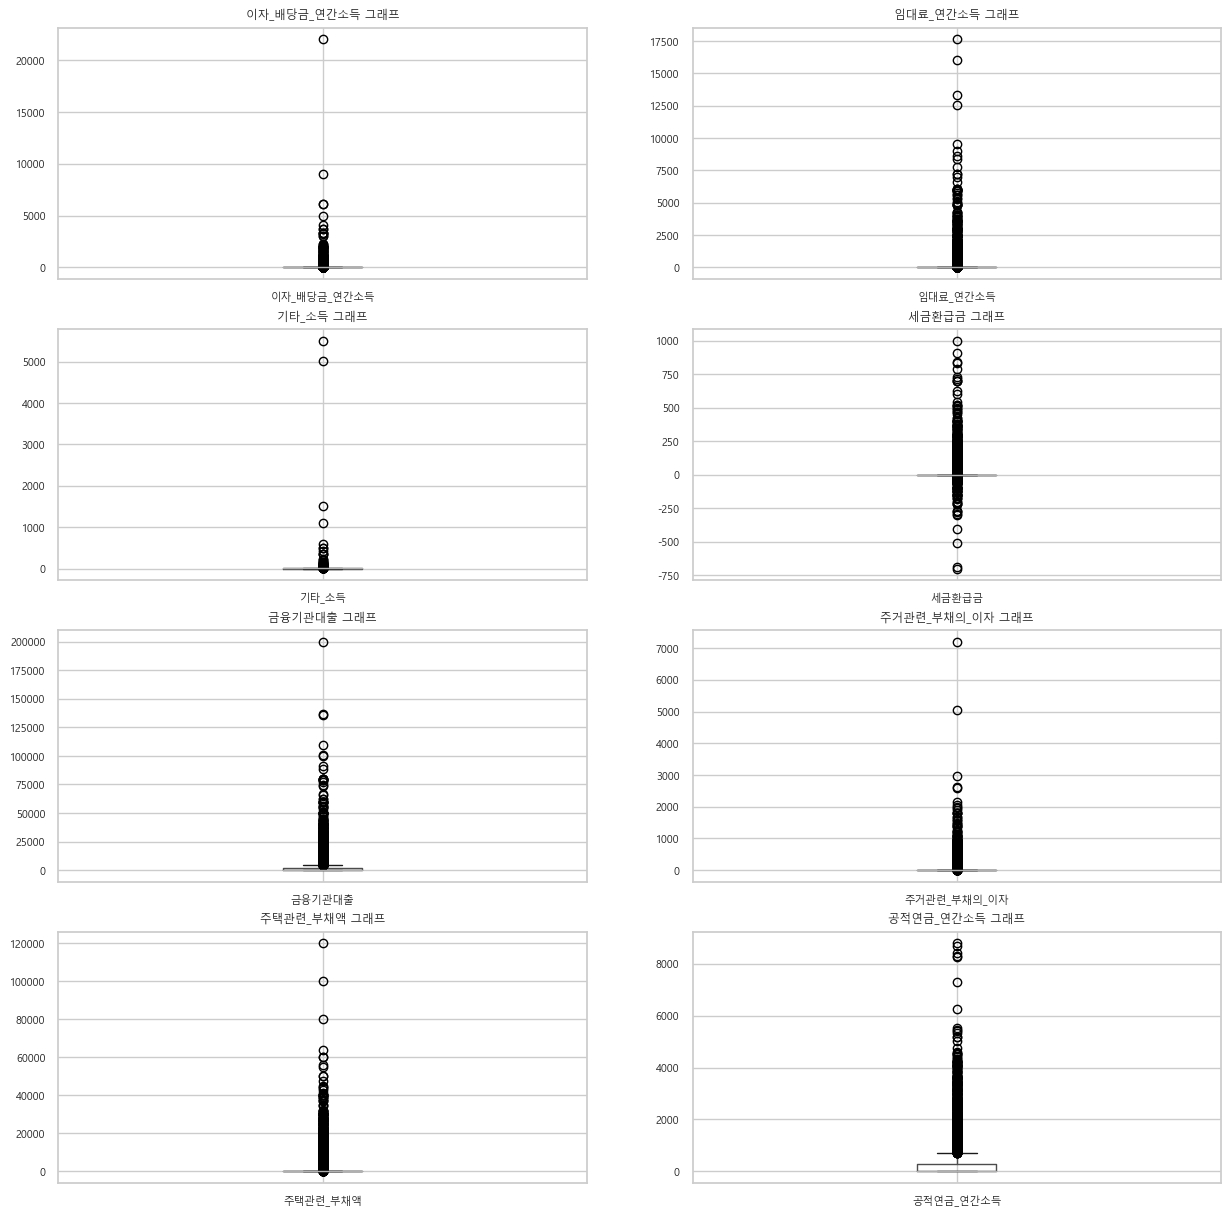

In [55]:
# 4Ìñâ 2Ïó¥Î°ú 8Í∞úÏùò ÏÑúÎ∏åÌîåÎ°Ø Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
for i, c in enumerate(columns):
    row, col = divmod(i, 2)
    re_df1.boxplot(column=c, ax=ax[row, col])
    ax[row, col].set_title(f"{c} Í∑∏ÎûòÌîÑ")
    plt.grid(True)
plt.show()

In [56]:
des_df = df.describe()
des_df

Ï¥ùÏÉùÌôúÎπÑ   Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù      ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù        Í∏∞ÌÉÄ_ÏÜåÎìù        ÏÑ∏Í∏àÌôòÍ∏âÍ∏à  \
count    7865.000000   7865.000000   7865.000000  7865.000000  7865.000000   
mean      329.821615     55.537889    129.335537     8.455906    14.505976   
std      1314.994181    347.927318    644.462635    87.829841    59.830654   
min        23.000000      0.000000      0.000000     0.000000  -700.000000   
25%       121.000000      0.000000      0.000000     1.000000     0.000000   
50%       228.000000      0.000000      0.000000     7.000000     0.000000   
75%       435.000000     20.000000      0.000000     8.000000     0.000000   
max    114446.000000  22025.000000  17640.000000  5506.000000  1000.000000   

              Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú  Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê       Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°    Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù  
count    7865.000000  7865.000000    6786.000000  7865.000000  
mean     2958.797203    53.391736    2055.432508   288.638525  
std      8277.347380   195.465924    5901.854652   675.030701  
min         0.000000     0.000000       0.000000     0.000000  
25%         0.000000     0.000000       0.000000     0.000000  
50%         0.000000     0.000000       0.000000     0.000000  
75%      1700.000000     0.000000       0.000000   288.000000  
max    200000.000000  7200.000000  120000.000000  8796.000000

### regplot, boxplot Ï°∞Ìöå Í≤∞Í≥º

1) xÍ∞íÏúºÎ°ú ÎÑ£ÏùÑ Ï¢ÖÏÜçÎ≥ÄÏàò(Ï¥ùÏÉùÌôúÎπÑ)ÏóêÏÑú 1Í±¥Îßå ÎπÑÏ†ïÏÉÅÏúºÎ°ú ÎÜíÏùÄ ÏàòÏπò ÌôïÏù∏ÎêòÏñ¥ Ï†úÍ±∞ÌïòÍ≥† ÏßÑÌñâ

2) yÍ∞íÏúºÎ°ú ÎÑ£ÏùÑ ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ Ï§ë Ïù¥ÏÉÅÏπòÍ∞Ä Í∞Å Ïª¨ÎüºÏóêÏÑú Î∞úÍ≤¨ÎêòÏñ¥ ÌîÑÎ°úÏ†ùÌä∏ Ï∞∏Í∞ÄÏûêÎì§ Ï£ºÍ¥ÄÏ†Å ÌåêÎã®Ïóê ÏùòÌï¥ Ï†úÍ±∞ÌïòÍ∏∞Î°ú Í≤∞Ï†ï

3) Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù ÏÉÅÏúÑÏù¥ÏÉÅÏπò 2Í±¥, ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù ÏÉÅÏúÑÏù¥ÏÉÅÏπò 4Í±¥,Í∏∞ÌÉÄ_ÏÜåÎìù ÏÉÅÏúÑÏù¥ÏÉÅÏπò 4Í±¥,<br>
     Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï° ÏÉÅÏúÑÏù¥ÏÉÅÏπò 3Í±¥, Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù ÏÉÅÏúÑÏù¥ÏÉÅÏπò 7Í±¥<br>
     ÏÑ∏Í∏àÌôòÍ∏âÍ∏à ÏÉÅÏúÑÏù¥ÏÉÅÏπò 8Í±¥, Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú ÏÉÅÏúÑÏù¥ÏÉÅÏπò 2Í±¥, Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê ÏÉÅÏúÑÏù¥ÏÉÅÏπò 4Í±¥

4) Ï¢ÖÏÜçÎ≥ÄÏàò,ÎèÖÎ¶ΩÎ≥ÄÏàò Ìè¨Ìï®Ìï¥ÏÑú Ï¥ù35Í±¥Ïùò Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ÌïòÏòÄÏùå

Ïù¥ÏÉÅÏπò Ìñâ Ï†úÏô∏ÌïòÍ≥† Ïû¨Ï°∞Ìöå

In [57]:
df2=re_df1.query('(Ï¥ùÏÉùÌôúÎπÑ < 5000) and (Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù < 7000) and (ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù < 11000) and\
                 (Í∏∞ÌÉÄ_ÏÜåÎìù < 1000) and (Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï° <75000) and (Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù <6000) and \
                 (ÏÑ∏Í∏àÌôòÍ∏âÍ∏à > -500 and ÏÑ∏Í∏àÌôòÍ∏âÍ∏à < 750)\
                 and (Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú < 125000) and (Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê < 2500)')
df2

Ï¥ùÏÉùÌôúÎπÑ  Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù  ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù  Í∏∞ÌÉÄ_ÏÜåÎìù  ÏÑ∏Í∏àÌôòÍ∏âÍ∏à  Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú  Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê  \
0      275          0.0         0    7.0    0.0   10000            0   
1      239          0.0         0    7.0    0.0       0            0   
2      156          0.0        80    7.0    0.0   14000          720   
3      541        140.0         0    9.0    0.0       0            0   
4       85         50.0         0    7.0    0.0       0            0   
...    ...          ...       ...    ...    ...     ...          ...   
7860   384          0.0         0    1.0   70.0    3000           96   
7861   715          0.0       660    1.0   90.0   40000            0   
7862   595          0.0      4000    1.0    0.0   25947           67   
7863   562         40.0         0    0.0    0.0   12000          360   
7864   514          0.0         0    1.0    0.0    1880            0   

      Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°  Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù  
0          0.0          0  
1          0.0          0  
2      20500.0        540  
3          0.0          0  
4          0.0          0  
...        ...        ...  
7860    3000.0          0  
7861       0.0          0  
7862   25947.0          0  
7863   12000.0          0  
7864       0.0          0  

[7830 rows x 9 columns]

Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ÌõÑ Ï∂îÏÑ∏ÏÑ†Ïù¥ Ïò¨ÎùºÏò§ÎäîÏßÄ regplotÏúºÎ°ú Í∑∏ÎûòÌîÑ Ïû¨ÌôïÏù∏ÌïòÍ∏∞

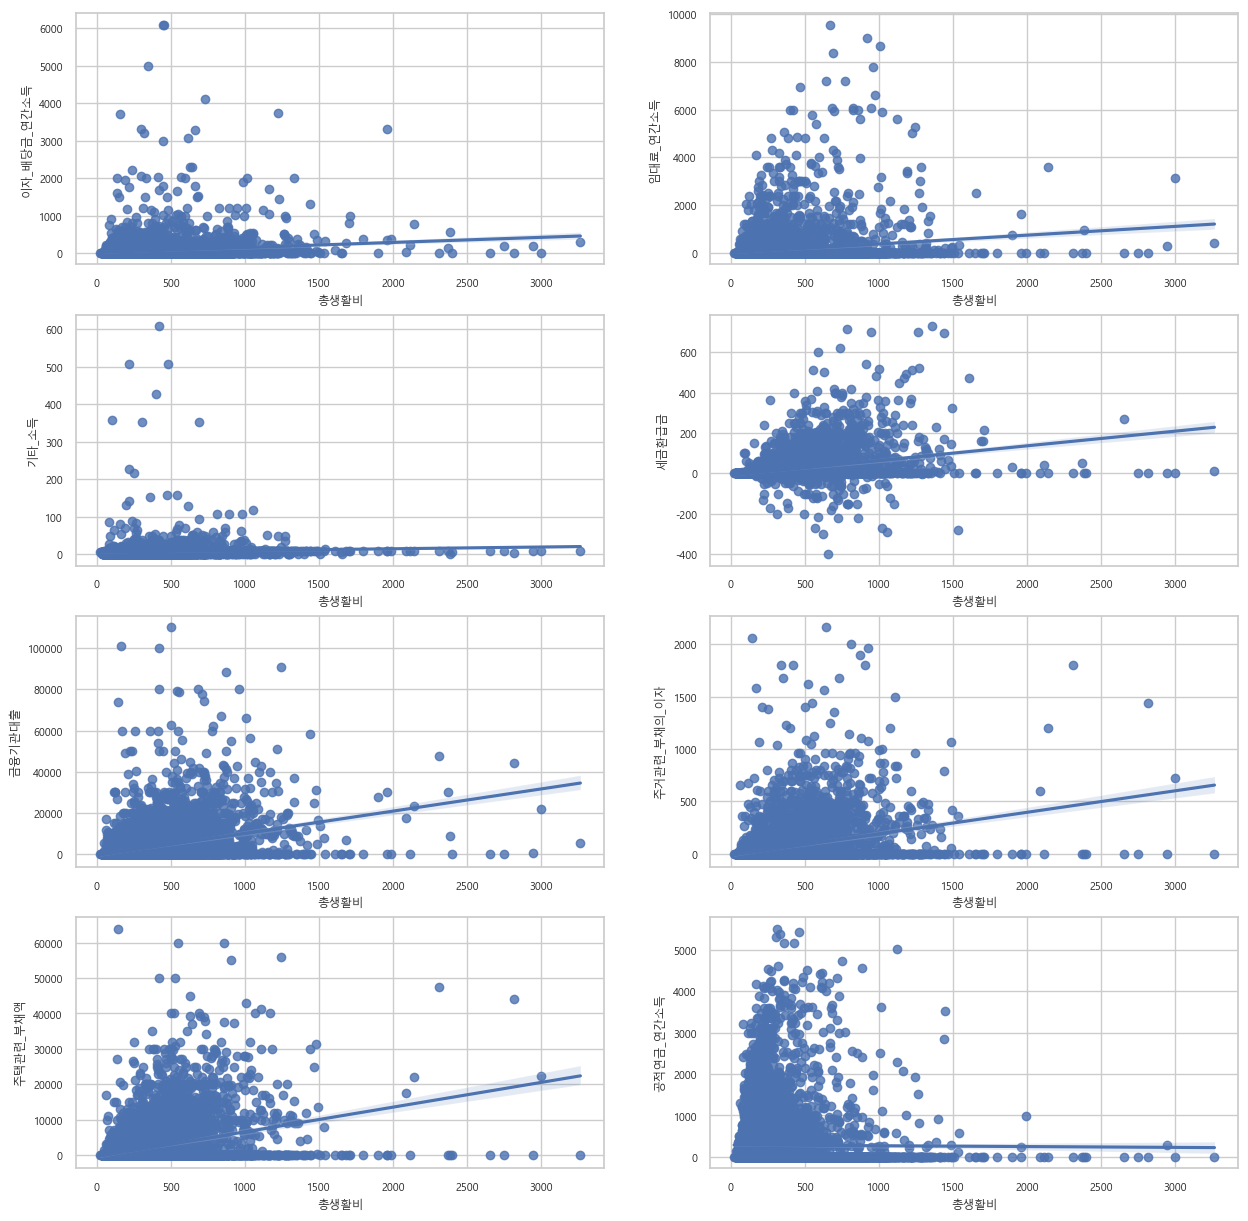

In [58]:
# index = 0Î∂ÄÌÑ∞ ÏãúÏûëÌïòÎ©¥ 'Ï¥ùÏÉùÌôúÎπÑ'-'Ï¥ùÏÉùÌôúÎπÑ' Í∑∏ÎûòÌîÑÎèÑ Í∑∏Î¶¨Î†§Í≥† ÏãúÎèÑÌï®
columns = list(df2.columns)[1:]

# 4Ìñâ 2Ïó¥Î°ú 8Í∞úÏùò ÏÑúÎ∏åÌîåÎ°Ø Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ï
dependent_variable = 'Ï¥ùÏÉùÌôúÎπÑ'

for i, c in enumerate(columns):
    row, col = divmod(i, 2)
    sb.regplot(data=df2, x=dependent_variable, y=c, ax=ax[row, col])
    ax[row, col].set_xlabel(dependent_variable)
    ax[row, col].set_ylabel(c)
    ax[row, col].grid(True)

plt.show()
plt.close()

In [59]:
des_df2 = df2.describe().round(3)
des_df2

Ï¥ùÏÉùÌôúÎπÑ  Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù  ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù     Í∏∞ÌÉÄ_ÏÜåÎìù     ÏÑ∏Í∏àÌôòÍ∏âÍ∏à      Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú  \
count  7830.000     7830.000  7830.000  7830.000  7830.000    7830.000   
mean    313.272       51.184   121.446     6.765    14.121    2854.026   
std     266.982      222.232   550.526    15.660    54.118    7545.379   
min      23.000        0.000     0.000     0.000  -400.000       0.000   
25%     121.000        0.000     0.000     1.000     0.000       0.000   
50%     227.000        0.000     0.000     7.000     0.000       0.000   
75%     433.000       20.000     0.000     8.000     0.000    1600.000   
max    3265.000     6100.000  9552.000   608.000   730.000  110000.000   

       Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê   Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°  Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù  
count     7830.000   7830.000   7830.000  
mean        50.685   1725.766    281.977  
std        160.491   5149.011    634.145  
min          0.000      0.000      0.000  
25%          0.000      0.000      0.000  
50%          0.000      0.000      0.000  
75%          0.000      0.000    288.000  
max       2160.000  64000.000   5520.000

ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÎ∂ÑÏÑù ÌÜµÌï¥ ÏÉÅÍ¥ÄÍ≥ÑÏàòÏôÄ p-valueÍ∞í ÌôïÏù∏ÌïòÍ∏∞

In [60]:
correlations = {}
columns = df2.select_dtypes(include=[float, int]).columns

for col in columns:
    if col != 'Ï¥ùÏÉùÌôúÎπÑ':
        r, p = stats.pearsonr(df2['Ï¥ùÏÉùÌôúÎπÑ'], df2[col])
        correlations[col] = (r, p)

# Í≤∞Í≥º Ï∂úÎ†•
for col, (r, p) in correlations.items():
    print(f"'Ï¥ùÏÉùÌôúÎπÑ' and '{col}' Í∞ÑÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑù:")
    print(f"ÏÉÅÍ¥ÄÍ≥ÑÏàò: {r}")
    print(f"P-value: {p}")
    print("-" * 30)

'Ï¥ùÏÉùÌôúÎπÑ' and 'Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù' Í∞ÑÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑù:
ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.16314738297932818
P-value: 7.638725754080436e-48
------------------------------
'Ï¥ùÏÉùÌôúÎπÑ' and 'ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù' Í∞ÑÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑù:
ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.17811669108795505
P-value: 7.956642651475088e-57
------------------------------
'Ï¥ùÏÉùÌôúÎπÑ' and 'Í∏∞ÌÉÄ_ÏÜåÎìù' Í∞ÑÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑù:
ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.07896518600206892
P-value: 2.6107745641463067e-12
------------------------------
'Ï¥ùÏÉùÌôúÎπÑ' and 'ÏÑ∏Í∏àÌôòÍ∏âÍ∏à' Í∞ÑÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑù:
ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.35837229167487744
P-value: 5.522347059288661e-236
------------------------------
'Ï¥ùÏÉùÌôúÎπÑ' and 'Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú' Í∞ÑÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑù:
ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.38025485911675905
P-value: 7.898255190936739e-268
------------------------------
'Ï¥ùÏÉùÌôúÎπÑ' and 'Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê' Í∞ÑÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑù:
ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.3409581757096795
P-value: 2.2417650986055645e-212
------------------------------
'Ï¥ùÏÉùÌôúÎπÑ' and 'Ï£ºÌÉùÍ¥ÄÎ†®_Î∂Ä

Í∑∏ÎûòÌîÑÏôÄ ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÎ∂ÑÏÑùÏùÑ Î∞îÌÉïÏúºÎ°ú Ï¥ùÏÉùÌôúÎπÑ(=ÏÜåÎπÑÍ∏àÏï°) Í∏àÏï°Ïù¥ Ïª§ÏßàÏàòÎ°ù Î∂àÎ°úÏÜåÎìù(Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù, ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù, ÏÑ∏Í∏àÌôòÍ∏âÍ∏à)Ïù¥ `ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ`Î•º Í∞ÄÏßÑÎã§Í≥† ÏòàÏ∏°Ìï† Ïàò ÏûàÎã§.

Îã§Îßå, `Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù`Í≥ºÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÌÅ¨ÏßÄ ÏïäÎã§Í≥† ÌåêÎã®Ïù¥ ÎêúÎã§.

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í∞ùÏ≤¥Î•º ÌÜµÌï¥ ÏÉÅÍ¥ÄÍ≥ÑÏàò Íµ¨ÌïòÍ∏∞ Î∞è ÌûàÌä∏Îßµ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî

In [61]:
corr = df2.corr(method='pearson')
corr

Ï¥ùÏÉùÌôúÎπÑ  Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù  ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù     Í∏∞ÌÉÄ_ÏÜåÎìù     ÏÑ∏Í∏àÌôòÍ∏âÍ∏à    Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú  \
Ï¥ùÏÉùÌôúÎπÑ         1.000000     0.163147  0.178117  0.078965  0.358372  0.380255   
Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù  0.163147     1.000000  0.107434  0.019644  0.057853  0.050670   
ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù     0.178117     0.107434  1.000000  0.017712  0.015072  0.188534   
Í∏∞ÌÉÄ_ÏÜåÎìù        0.078965     0.019644  0.017712  1.000000  0.049301  0.029858   
ÏÑ∏Í∏àÌôòÍ∏âÍ∏à        0.358372     0.057853  0.015072  0.049301  1.000000  0.199542   
Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú       0.380255     0.050670  0.188534  0.029858  0.199542  1.000000   
Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê  0.340958     0.015769  0.081602  0.016758  0.194347  0.667216   
Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°     0.362720     0.024315  0.070473  0.027468  0.226202  0.726963   
Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù   -0.008377     0.073351  0.094136  0.001033 -0.085098 -0.058325   

             Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê  Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°  Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù  
Ï¥ùÏÉùÌôúÎπÑ            0.340958  0.362720  -0.008377  
Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù     0.015769  0.024315   0.073351  
ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù        0.081602  0.070473   0.094136  
Í∏∞ÌÉÄ_ÏÜåÎìù           0.016758  0.027468   0.001033  
ÏÑ∏Í∏àÌôòÍ∏âÍ∏à           0.194347  0.226202  -0.085098  
Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú          0.667216  0.726963  -0.058325  
Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê     1.000000  0.847931  -0.061578  
Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°        0.847931  1.000000  -0.075824  
Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù      -0.061578 -0.075824   1.000000

## #Ï†ÑÏ≤òÎ¶¨2. Ï†ïÍ∑úÏÑ±/Îì±Î∂ÑÏÇ∞ÏÑ±/ÎèÖÎ¶ΩÏÑ± ÌôïÏù∏

ÎπÑÎ™®ÏàòÏ†ÅÏù∏ Î∞©Î≤ï ÏÇ¨Ïö©, Î°úÎ≤ÑÏä§Ìä∏(robust) ÌÜµÍ≥Ñ Í∏∞Î≤ï ÏÇ¨Ïö©, ÎåÄÍ∑úÎ™® Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©, ÌÜµÍ≥Ñ Í∏∞Î≤ïÍ≥º Î™©Ï†ÅÏóê Îî∞Î•∏ Ïú†Ïó∞ÏÑ±(ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò ÏòàÏ∏° Î™®Îç∏ÎßÅÏù¥ Î™©Ï†Å)Ïóê Îî∞Îùº Ï†ïÍ∑úÏÑ±/Îì±Î∂ÑÏÇ∞ÏÑ±/ÎèÖÎ¶ΩÏÑ± ÌôïÏù∏ÏùÑ Ï†úÏô∏

ÌòÑÏû¨ ÎåÄÍ∑úÎ™® Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±, Îì±Î∂ÑÏÇ∞ÏÑ±, ÎèÖÎ¶ΩÏÑ± ÌôïÏù∏ÏùÄ Ï†úÏô∏ÌïòÍ∏∞Î°ú Í≤∞Ï†ï

ÏßÑÏÑùÎãò ÏùòÍ≤¨: ÏÑ†ÌòïÌöåÍ∑Ä->Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ïÏúºÎ°ú ÎåÄÏ≤¥Î•º Ìï¥ÏïºÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞

In [62]:
#Ï†ïÍ∑úÌôî ÌïòÍ∏∞ Ï†Ñ Ïã†Î¢∞Íµ¨Í∞Ñ Íµ¨ÌïòÍ∏∞
df2Col = list(df2.columns)
# df2Col
for cc in df2Col:
    print("%s Ïã†Î¢∞Íµ¨Í∞Ñ"%cc)
    getConfidenceInterval(df2["%s"%cc])
    # print('\n')

Ï¥ùÏÉùÌôúÎπÑ Ïã†Î¢∞Íµ¨Í∞Ñ
+------+------------+
|      |   Ïã†Î¢∞Íµ¨Í∞Ñ |
|------+------------|
| ÌïòÌïú |    307.358 |
| ÏÉÅÌïú |    319.187 |
+------+------------+
Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù Ïã†Î¢∞Íµ¨Í∞Ñ
+------+------------+
|      |   Ïã†Î¢∞Íµ¨Í∞Ñ |
|------+------------|
| ÌïòÌïú |    46.2607 |
| ÏÉÅÌïú |     56.107 |
+------+------------+
ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù Ïã†Î¢∞Íµ¨Í∞Ñ
+------+------------+
|      |   Ïã†Î¢∞Íµ¨Í∞Ñ |
|------+------------|
| ÌïòÌïú |     109.25 |
| ÏÉÅÌïú |    133.642 |
+------+------------+
Í∏∞ÌÉÄ_ÏÜåÎìù Ïã†Î¢∞Íµ¨Í∞Ñ
+------+------------+
|      |   Ïã†Î¢∞Íµ¨Í∞Ñ |
|------+------------|
| ÌïòÌïú |    6.41806 |
| ÏÉÅÌïú |    7.11188 |
+------+------------+
ÏÑ∏Í∏àÌôòÍ∏âÍ∏à Ïã†Î¢∞Íµ¨Í∞Ñ
+------+------------+
|      |   Ïã†Î¢∞Íµ¨Í∞Ñ |
|------+------------|
| ÌïòÌïú |    12.9223 |
| ÏÉÅÌïú |      15.32 |
+------+------------+
Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú Ïã†Î¢∞Íµ¨Í∞Ñ
+------+------------+
|      |   Ïã†Î¢∞Íµ¨Í∞Ñ |
|------+------------|
| ÌïòÌïú |    2686.87 |
| ÏÉÅÌïú |   

Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ†ï Î∞è Î∂ÑÏÑù(Ï†ïÍ∑úÌôî ÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞)

## #Ï†ÑÏ≤òÎ¶¨3. ÌëúÏ§ÄÌôî-Ï†ïÍ∑úÌôî(Scaling)

ÌëúÏ§ÄÌôî(Ï†ïÍ∑úÌôî)Î•º ÌÜµÌï¥ ÏÑúÎ°ú Îã§Î•∏ Îã®ÏúÑÎÇò Î≤îÏúÑÎ•º Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞Î•º ÎèôÏùºÌïú Í∏∞Ï§ÄÏúºÎ°ú ÎßûÏ∂§ÏúºÎ°úÏç®, Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏù¥ÎÇò Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅ.

Îã§Îßå, ÌòÑÏû¨ ÏÇ¨Ïö©Ï§ëÏù∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî Î™ÖÎ™©Ìòï(Î≤îÏ£ºÌòï)Î≥ÄÏàòÎ•º Ï†úÏô∏Ìïú Í≤ΩÏö∞Ïù∏ ÎßåÌÅº ÎçîÎØ∏Î≥ÄÏàòÌôî ÏãúÌÇ¨ ÌïÑÏöîÍ∞Ä ÏóÜÎã§Í≥† ÌåêÎã®, Ïä§ÏºÄÏùºÎßÅÎßå ÏßÑÌñâÌïòÍ∏∞Î°ú Í≤∞Ï†ï.

ÏãúÍ∞ÑÏù¥ ÎêúÎã§Î©¥ (ÌëúÏ§ÄÌôî Ï†ÅÏö©Ìïú Í≤∞Í≥º/ÌëúÏ§ÄÌôîÎ•º Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùÄ Í≤∞Í≥ºÏùò Ï∞®Ïù¥Î•º ÎπÑÍµê, ÌïôÏäµ)

Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôîÌïòÍ∏∞

In [63]:
scaler=StandardScaler()

df3=df2.copy()

df3.loc[:, 'Ï¥ùÏÉùÌôúÎπÑ(std)'] = scaler.fit_transform(df3[['Ï¥ùÏÉùÌôúÎπÑ']])
df3.loc[:, 'Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù(std)'] = scaler.fit_transform(df3[['Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù']])
df3.loc[:, 'ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù(std)'] = scaler.fit_transform(df3[['ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù']])
df3.loc[:, 'Í∏∞ÌÉÄ_ÏÜåÎìù(std)'] = scaler.fit_transform(df3[['Í∏∞ÌÉÄ_ÏÜåÎìù']])
df3.loc[:, 'ÏÑ∏Í∏àÌôòÍ∏âÍ∏à(std)'] = scaler.fit_transform(df3[['ÏÑ∏Í∏àÌôòÍ∏âÍ∏à']])
df3.loc[:, 'Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú(std)'] = scaler.fit_transform(df3[['Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú']])
df3.loc[:, 'Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê(std)'] = scaler.fit_transform(df3[['Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê']])
df3.loc[:, 'Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°(std)'] = scaler.fit_transform(df3[['Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°']])
df3.loc[:, 'Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù(std)'] = scaler.fit_transform(df3[['Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù']])
df3.drop(['Ï¥ùÏÉùÌôúÎπÑ','Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù','ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù','Í∏∞ÌÉÄ_ÏÜåÎìù','ÏÑ∏Í∏àÌôòÍ∏âÍ∏à','Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú','Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê',
          'Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°','Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù'],axis=1,inplace=True)

df3

Ï¥ùÏÉùÌôúÎπÑ(std)  Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù(std)  ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù(std)  Í∏∞ÌÉÄ_ÏÜåÎìù(std)  ÏÑ∏Í∏àÌôòÍ∏âÍ∏à(std)  \
0     -0.143361         -0.230332      -0.220614    0.015010   -0.260949   
1     -0.278210         -0.230332      -0.220614    0.015010   -0.260949   
2     -0.589112         -0.230332      -0.075289    0.015010   -0.260949   
3      0.853023          0.399681      -0.220614    0.142735   -0.260949   
4     -0.855064         -0.005327      -0.220614    0.015010   -0.260949   
...         ...               ...            ...         ...         ...   
7860   0.264932         -0.230332      -0.220614   -0.368166    1.032604   
7861   1.504793         -0.230332       0.978317   -0.368166    1.402191   
7862   1.055296         -0.230332       7.045634   -0.368166   -0.260949   
7863   0.931685         -0.050328      -0.220614   -0.432028   -0.260949   
7864   0.751886         -0.230332      -0.220614   -0.368166   -0.260949   

      Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú(std)  Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê(std)  Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°(std)  Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù(std)  
0        0.947127         -0.315830      -0.335186       -0.444685  
1       -0.378272         -0.315830      -0.335186       -0.444685  
2        1.477286          4.170679       3.646416        0.406910  
3       -0.378272         -0.315830      -0.335186       -0.444685  
4       -0.378272         -0.315830      -0.335186       -0.444685  
...           ...               ...            ...             ...  
7860     0.019347          0.282372       0.247487       -0.444685  
7861     4.923324         -0.315830      -0.335186       -0.444685  
7862     3.060741          0.101665       4.704356       -0.444685  
7863     1.212207          1.927425       1.995508       -0.444685  
7864    -0.129097         -0.315830      -0.335186       -0.444685  

[7830 rows x 9 columns]

In [64]:
cls=list(df2.columns)
cls.remove("Ï¥ùÏÉùÌôúÎπÑ")
cls

['Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù',
 'ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù',
 'Í∏∞ÌÉÄ_ÏÜåÎìù',
 'ÏÑ∏Í∏àÌôòÍ∏âÍ∏à',
 'Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú',
 'Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê',
 'Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°',
 'Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù']

In [65]:
ols_result = myOls(df2, x=cls, y="Ï¥ùÏÉùÌôúÎπÑ")

In [66]:
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                   Ï¥ùÏÉùÌôúÎπÑ   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     363.1
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:56:17   Log-Likelihood:                -53621.
No. Observations:                7830   AIC:                         1.073e+05
Df Residuals:                    7821   BIC:                         1.073e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     238.9974      3.284     72.7

In [67]:
ols_result.table

B   ÌëúÏ§ÄÏò§Ï∞®  Œ≤        t   Ïú†ÏùòÌôïÎ•†       VIF
Ï¢ÖÏÜçÎ≥ÄÏàò ÎèÖÎ¶ΩÎ≥ÄÏàò                                                   
Ï¥ùÏÉùÌôúÎπÑ Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù  0.1445  0.012  0  12.328*  0.000  1.096175
     ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù     0.0544  0.005  0  11.238*  0.000  1.137131
     Í∏∞ÌÉÄ_ÏÜåÎìù        0.8827  0.165  0   5.353*  0.000  1.143680
     ÏÑ∏Í∏àÌôòÍ∏âÍ∏à        1.3661  0.049  0  27.756*  0.000  1.244113
     Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú       0.0062  0.001  0  12.131*  0.000  2.631621
     Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê  0.1312  0.031  0   4.287*  0.000  4.003307
     Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°     0.0049  0.001  0   4.692*  0.000  4.832777
     Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìù    0.0076  0.004  0   1.843*  0.065  1.144194

In [68]:
ols_result.result

'ùëÖ(0.271), ùëÖ^2(0.270), ùêπ(363.1), Ïú†ÏùòÌôïÎ•†(0.00), Durbin-Watson(1.790)'

In [69]:
ols_result.goodness

'Ï¥ùÏÉùÌôúÎπÑÏóê ÎåÄÌïòÏó¨ Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù,ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìù,Í∏∞ÌÉÄ_ÏÜåÎìù,ÏÑ∏Í∏àÌôòÍ∏âÍ∏à,Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂ú,Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥Ïûê,Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°,Í≥µÏ†ÅÏó∞Í∏à_Ïó∞Í∞ÑÏÜåÎìùÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎã§(F(8,7821) = 363.1, p < 0.05).'

In [70]:
ols_result.varstr

['Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìùÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.1445(p<0.05)Î°ú, Ï¥ùÏÉùÌôúÎπÑÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'ÏûÑÎåÄÎ£å_Ïó∞Í∞ÑÏÜåÎìùÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.0544(p<0.05)Î°ú, Ï¥ùÏÉùÌôúÎπÑÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'Í∏∞ÌÉÄ_ÏÜåÎìùÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.8827(p<0.05)Î°ú, Ï¥ùÏÉùÌôúÎπÑÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'ÏÑ∏Í∏àÌôòÍ∏âÍ∏àÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 1.3661(p<0.05)Î°ú, Ï¥ùÏÉùÌôúÎπÑÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'Í∏àÏúµÍ∏∞Í¥ÄÎåÄÏ∂úÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.0062(p<0.05)Î°ú, Ï¥ùÏÉùÌôúÎπÑÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'Ï£ºÍ±∞Í¥ÄÎ†®_Î∂ÄÏ±ÑÏùò_Ïù¥ÏûêÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.1312(p<0.05)Î°ú, Ï¥ùÏÉùÌôúÎπÑÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.',
 'Ï£ºÌÉùÍ¥ÄÎ†®_Î∂ÄÏ±ÑÏï°Ïùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.0049(p<0.05)Î°ú, Ï¥ùÏÉùÌôúÎπÑÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.'

In [71]:
clevel=0.95

In [72]:
#ÏÉòÌîåÏÇ¨Ïù¥Ï¶à
n=len(df2['Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù'])
n

7830

In [73]:
#ÏûêÏú†ÎèÑ Íµ¨ÌïòÍ∏∞
dof=n-1
dof

7829

In [74]:
#ÌëúÎ≥∏ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
sample_mean=df2['Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù'].mean()
sample_mean

51.183844189016604

In [75]:
#ÌëúÎ≥∏ÌëúÏ§Ä Ìé∏Ï∞®
sample_std=df['Ïù¥Ïûê_Î∞∞ÎãπÍ∏à_Ïó∞Í∞ÑÏÜåÎìù'].std(ddof=1)
sample_std

347.9273184229798

In [76]:
from math import sqrt
sample_std_error=sample_std/sqrt(n)
sample_std_error

3.93194694225465

In [77]:
cmin,cmax=t.interval(clevel,dof,loc=sample_mean,scale=sample_std_error)
cmin,cmax

(43.47617818976518, 58.89151018826803)

+------+------------+
|      |   Ïã†Î¢∞Íµ¨Í∞Ñ |
|------+------------|
| ÌïòÌïú |    46.2607 |
| ÏÉÅÌïú |     56.107 |
+------+------------+
